# 教師なし学習
前章までは入力値と目標値をセットで持つ問題設定に対して用いる機械学習の種類である**教師あり学習**を扱いました。    
しかし、すべてのデータが目標値を持つわけではありません。  

そこで本章では、目標値を持たない問題設定に対して用いる**教師なし学習**を扱います。  
教師なし学習には２つの代表的な手法があり、どちらもデータの背後に存在する本質的な構造を抽出する際に用います。  

## 本章の構成

- 主成分分析 (Principal Component Analysis)
- k 平均法 (k-means)

## 主成分分析

**主成分分析 (Principal Component Analysis)** は**次元削減 (Dimensionality reduction)** の手法になります。  
次元削減とは、例えば 4 次元のデータ（列数が 4 つのデータ）があった場合、2 次元などの低次元に落とし込むことを指します。  
また、一般的に次元削減は単にデータを削除するのではなく、可能な限り元のデータの情報を保持したまま、低次元のデータに変形を行います。  

その次元削減の 1 つの手法として、主成分分析があります。主成分分析は PCA と略されて呼ばれる場合があることも覚えておきましょう。  
主成分分析の詳細に関しては[こちら](https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)を確認してください。  

実際に主成分分析を用いて次元削減を行い、内容を確認しましょう。  
データセットは scikit-learn にデフォルトで用意されているアヤメ (Iris) のデータセットを使用します。  

In [50]:
# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# データの読み込み
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [52]:
# データの確認
pd.DataFrame(x, columns=feature_names).head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


元のデータは 4 次元あることが確認できます。このデータを主成分分析を用いて、2 次元に落とし込みましょう。  
主成分分析の実装もこれまでの実装方法と同じになります。  

In [53]:
#  モデルの定義
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

`n_components` で指定しているのは、次元削減後の次元数です。  
今回は 4 次元から 2 次元に次元削減します。理由としては、2 次元であればデータを可視化することが可能というメリットがある点にあります。  

モデルの学習では主成分分析を適用するために必要な**共分散　(Covariance)** などの値を算出します。  
共分散の詳細は[こちら](https://ja.wikipedia.org/wiki/%E5%85%B1%E5%88%86%E6%95%A3)を確認してください。  

In [54]:
# モデルの学習
pca.fit(x)

PCA(n_components=2, random_state=0)

In [55]:
# 共分散の確認
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

算出された共分散を用いて、主成分分析を行います。実行には `transform` メソッド を使用します。

In [56]:
# 主成分分析の適用
x_transformed = pca.transform(x)

In [57]:
# 主成分分析適用後のデータの確認
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head(10)

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


データが 2 次元に落とし込まれていることが確認できました。  

1 列目のデータを**第一主成分**と呼び、2 列目を**第二主成分**と呼びます。  
それぞれの列は次元削減前の情報を保持しているといえます。それぞれの列が保持する元のデータの情報の割合を**寄与率 (Proportion of the variance)** と呼びます。  
寄与率は `fit()` メソッド後の `explained_variance_ratio_` 属性からそれぞれの寄与率を確認することができます。  

In [58]:
print('第一主成分の寄与率：{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率：{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率：0.9246187232017341
第二主成分の寄与率：0.05306648311706383


第一主成分は `92%` 、第二主成分は `5%` ほどの寄与率であることが確認できます。  
すなわち `97%` 程度の割合で元のデータの情報を保持したまま次元削減できていることが確認できます。  

このように、主成分分析は 100% 情報を保持したまま次元削減を行うのではなく、いくらかの情報は保持できていないことがわかります。  
主成分分析を適用した後にはこの寄与率を確認し、元のデータをどの程度再現できているのかを確認することが重要です。  

次元削減後のデータを可視化しましょう。  
今回はアヤメの花の種類が 3 種類のデータセットを使用しています。可視化を行う際にそれぞれのクラスに色をつけて表示し、次元削減後のデータを確認します。  

In [59]:
# 0, 1, 2 の 3 つのクラスがあることを確認
np.unique(t)

array([0, 1, 2])

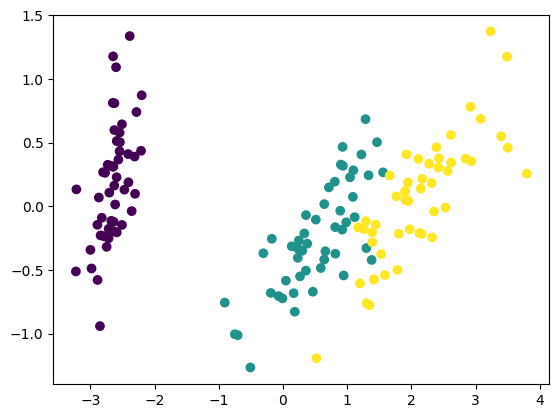

In [60]:
# 散布図で可視化
plt.scatter(x_transformed[:,0], x_transformed[:,1], c=t, cmap='viridis')

元のデータセットでは 4 次元のため可視化を行うことができませんでしたが、次元削減を行うことにより、データセットを可視化することができました。  
このように可視化することにより、データセットについて直感的に理解できるということは重要です。  

例えば今回の可視化結果から、このデータセットで分類を行った場合、ラベル 1（緑）　と ラベル 2（黄）は分類することが少し困難であることが想定することができます。  また、ラベル 0 に関しては機械学習を用いることなく、分類を行うことも可能そうであることがわかります。  

次元削減を行うことにより、可視化困難であったデータを可視化することができるということは、大きなメリットがあることが確認できます。  

## k 平均法

**k 平均法 (k-means)** はクラスタリングと呼ばれる手法に当たり、データを複数のクラスター（グループ）に分けて大まかな特徴を捉える際に使用します。直感的には[こちら](http://tech.nitoyon.com/ja/blog/2013/11/07/k-means/)のアニメーションが非常に理解しやすいです。  

k 平均法がクラスタリングを行うステップは次の通りです。  

1. 人間側がクラスター（グループ）の数を決める  
2. ランダムに振られた点（重心）から近いものをクラスターとする  
3. 紐づいたクラスターとの距離を元に重心を移動させる  
4. 重心が動かなくなるまで 3 を繰り返す  

今回はコンビニエンスストアの購買データを元にしてクラスタリングの活用方法を理解していきましょう。  
使用するデータは [convinience_store.csv](http://drive.google.com/uc?export=view&id=1FUh97sZ7VTHNx62aEzzHQepERbIKjr8J) をダウンロードしてください。

### colab へのデータアップロード

In [61]:
# colabへのアップロード
from google.colab import files
uploaded = files.upload()

Saving convinience_store.csv to convinience_store (1).csv


In [62]:
df = pd.read_csv('convinience_store.csv')
df.head(3)

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570


今回取り扱うデータセットはコンビニエンスストアのそれぞれの顧客の 3 ヶ月の購買履歴になります。  
列名の No は顧客 ID を表し、それぞれの顧客がどのカテゴリの商品を何円分購入したかを表しています。  
この過去の購買データを元に k 平均法を適用し、顧客をいくつかのクラスター（グループ）に分割します。  

k 平均法にデータを適用する際に顧客 ID は使用しないため、予め取り除いておきます。  
また、scikit-learn を用いて実装を行うため、同時 NumPy の `array` 形式に変換しておきます。

In [63]:
#  ID列を削除+Numpy形式に変換
x = df.iloc[:, 1:].values
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

### k 平均法の実装

実装方法はこれまでの手法と同様の手順で実装することができます。

In [64]:
from sklearn.cluster import KMeans

前述の説明にもある通り、k 平均法では予め分割するクラスター数を決めておく必要あります。  
クラスター数を決定するハイパーパラメータは `n_clusters` になります。

In [65]:
# モデルの定義
model = KMeans(n_clusters=3, random_state=0) # クラスターの数を定義

In [66]:
# モデルの学習
model.fit(x)

KMeans(n_clusters=3, random_state=0)

モデルの学習が完了しました。モデルの学習ではそれぞれのクラスターの中心座標を算出し、保持します。  
今回取り扱ったデータセットの次元数が 6 次元、そしてクラスターの数を 3 と指定していたため、3 行 6 列の値を確認することができます。

In [67]:
# クラスターの中心座標の確認
model.cluster_centers_

array([[ 4728.33333333,  3310.13333333,  7251.66666667,  2246.1       ,
         2206.66666667,  3626.1       ],
       [30490.        ,  5910.15      ,  1396.5       ,  1059.9       ,
          985.05      ,   698.35      ],
       [17602.5       ,  3342.        ,  8203.25      ,   958.6       ,
         4310.5       ,  7550.4       ]])

In [68]:
# クラスター数 3、入力変数の数 6 であることが確認できる
model.cluster_centers_.shape

(3, 6)

`.predict()` メソッドで入力の値に対してクラスタリングを適用することができます。

In [69]:
# クラスタリングの適用
cluster = model.predict(ｘ)
cluster

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

予測値が 0 ~ 2 となっていて、ハイパーパラメータで設定したクラスター数と同じことが確認できます。  
しかし、この結果からではどのようにクラスタリングされているか判断が難しいため、この情報を元のデータフレームに追加します。

In [70]:
# データフレームの作成
df_cluster = df.copy() # データフレームをコピー
df_cluster['cluster'] = cluster

In [71]:
df_cluster.head(2)

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1


### クラスタリング結果の考察

クラスタリングした結果、顧客を 3 つのクラスター（グループ）に分けることができました。  
しかし、クラスターに分けるだけではどのように活用できるかわかりません。  

教師なし学習は教師あり学習と異なり明確な答えが存在しないため、その予測結果がどのようなもので、どのように活用するかに関しては人間側が考慮する必要がある部分であることを覚えておきましょう。  

今回分割した 3 つの顧客クラスターに対してどのような活用方法があるのかを考察していきます。  
今回は一例として、各クラスターの平均購買金額から考察を行います。

In [72]:
# 空のデータフレームを作成します。
df_results = pd.DataFrame()
df_results

""


クラスターごとに平均値を算出し、その値を先程作成した空のデータフレームに追加していきます。

In [73]:
df_results['cluster0'] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster1'] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster2'] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()

In [74]:
df_results

,cluster0,cluster1,cluster2
0,38.433333,53.40,13.20
1,4728.333333,30490.00,17602.50
2,3310.133333,5910.15,3342.00
3,7251.666667,1396.50,8203.25
4,2246.100000,1059.90,958.60
5,2206.666667,985.05,4310.50
6,3626.100000,698.35,7550.40
7,0.000000,1.00,2.00


行が先ほどのデータフレームの列名に当てはまるため、行に列名を当てはめます。  
また転置し、列がそれぞれの項目、行がクラスターになるように変更します。

In [75]:
df_results = df_results.set_index(df_cluster.columns) # Index に列名を追加
df_results = df_results.drop(['No', 'cluster']).T

In [76]:
# 結果の表示
df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster0,4728.333333,3310.133333,7251.666667,2246.1,2206.666667,3626.10
cluster1,30490.000000,5910.150000,1396.500000,1059.9,985.050000,698.35
cluster2,17602.500000,3342.000000,8203.250000,958.6,4310.500000,7550.40


それぞれのクラスターの特徴を考察してみましょう。下記のような考察が得られるのではないでしょうか。  

- グループ 0 ：全体的に購入金額が少ないが、スイーツの購入金額は最も大きい  
- グループ 1 ：弁当・麺類と飲料の購入金額が最も大きい  
- グループ 2 ：飲料やスイーツの購入は少ないが、全般的に他の食品類の購入金額が大きい  

このように、目的をもってクラスタリング後のデータを加工・分析することでクラスターの特徴を把握することができます。  
この考察を用いて、 例えばランチの時間帯に配信するクーポンをグループごとに分ける事で、個々人の趣味嗜好に応じた効果的なマーケティング施策を行うことが可能です。  

教師なし学習ではこのように答えが無く、人間側が予測結果からデータの加工を行い、そこから活用方法の考察を行う必要がある点を覚えておきましょう。  

## 練習問題 本章のまとめ

本章で学んだ内容を復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  

- 先程取り扱ったコンビニエンスストアのデータセットを再度読み込み、`No` の列を削除、NumPy の形式に変換して、変数 `x` に格納
- `x` を用いて、k-平均法を適用（ `n_clusters=5` ）し、獲得したクラスターを変数 `cluster` に格納
- `x` に対し、主成分分析を適用（ `n_components=2` ）し、結果を変数 `x_transformed` に格納
- `x_transformed` を可視化し、先程取得した、変数 `cluster` に格納されている値を用いて色付けを行う

In [77]:
# データの読み込み
df = pd.read_csv('convinience_store.csv')
x = df.drop(['No'], axis=1).values

`x` を用いて、k-平均法を適用（ `n_clusters=5` ）し、獲得したクラスターを変数 `cluster` に格納

In [78]:
# k-平均法のモデルの定義
model = KMeans(n_clusters=5, random_state=0)

In [79]:
# モデルの学習
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [80]:
# クラスタリングの適用
print('cluster centers shape', model.cluster_centers_.shape)
cluster = model.predict(ｘ)
print(cluster)

cluster centers shape (5, 6)
[2 3 2 2 3 2 3 3 3 2 3 2 2 0 2 2 2 2 0 2 2 0 2 2 0 0 0 0 4 4 0 4 4 0 4 4 4
 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3]


`x` に対し、主成分分析を適用（ `n_components=2` ）し、結果を変数 `x_transformed` に格納

In [81]:
# 主成分分析のモデルの定義
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

In [82]:
# モデルの学習
pca.fit(x)

PCA(n_components=2, random_state=0)

In [83]:
# 主成分分析の適用
x_transformed = pca.transform(x)

`x_transformed` を可視化し、先程取得した、変数 `cluster` に格納されているクラスターを用いて色付けを行い可視化

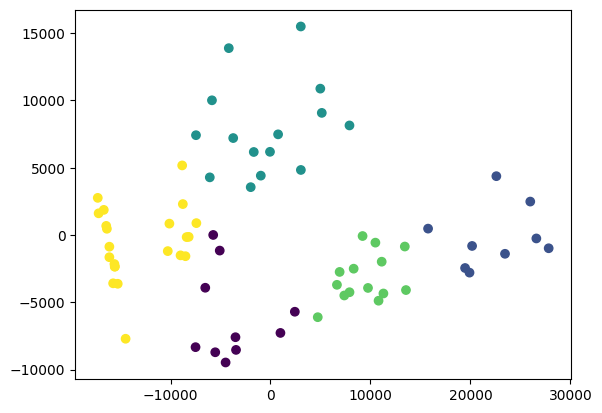

In [84]:
# 次元削減後のデータの可視化
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=cluster)

<img src="http://drive.google.com/uc?export=view&id=1g2xjXbw5qYeqdJqcOf3uASvzBQxhlE8u" width=30%>